<a href="https://colab.research.google.com/github/carterc64/CS-472-Intro-to-AI/blob/main/HW4CarterCopen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import sys
assert sys.version_info >= (3,7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Here I load in data using a google drive download link if it isnt already present

In [410]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def loadHousingData():
    tarballPath = Path("data/area_house_data.csv")
    if not tarballPath.is_file():
        Path("data").mkdir(parents=True, exist_ok=True)
        url = "https://drive.google.com/uc?id=12ZALz-vpMkx0qV_pHgc7UBkLYCuC-eTh&export=download"
        urllib.request.urlretrieve(url, tarballPath)
    return pd.read_csv(Path("data/area_house_data.csv"))

data = loadHousingData()


In [333]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Here I look at the attibutes and notice all have 21613 entries and that date is a catogorical attribute

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Here I look at the statistics involved with each attribute

In [335]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Here I look into the date attribute and look at what values are invloved

In [336]:
data["date"].value_counts()

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64

Here I look at the histograms of each attribute

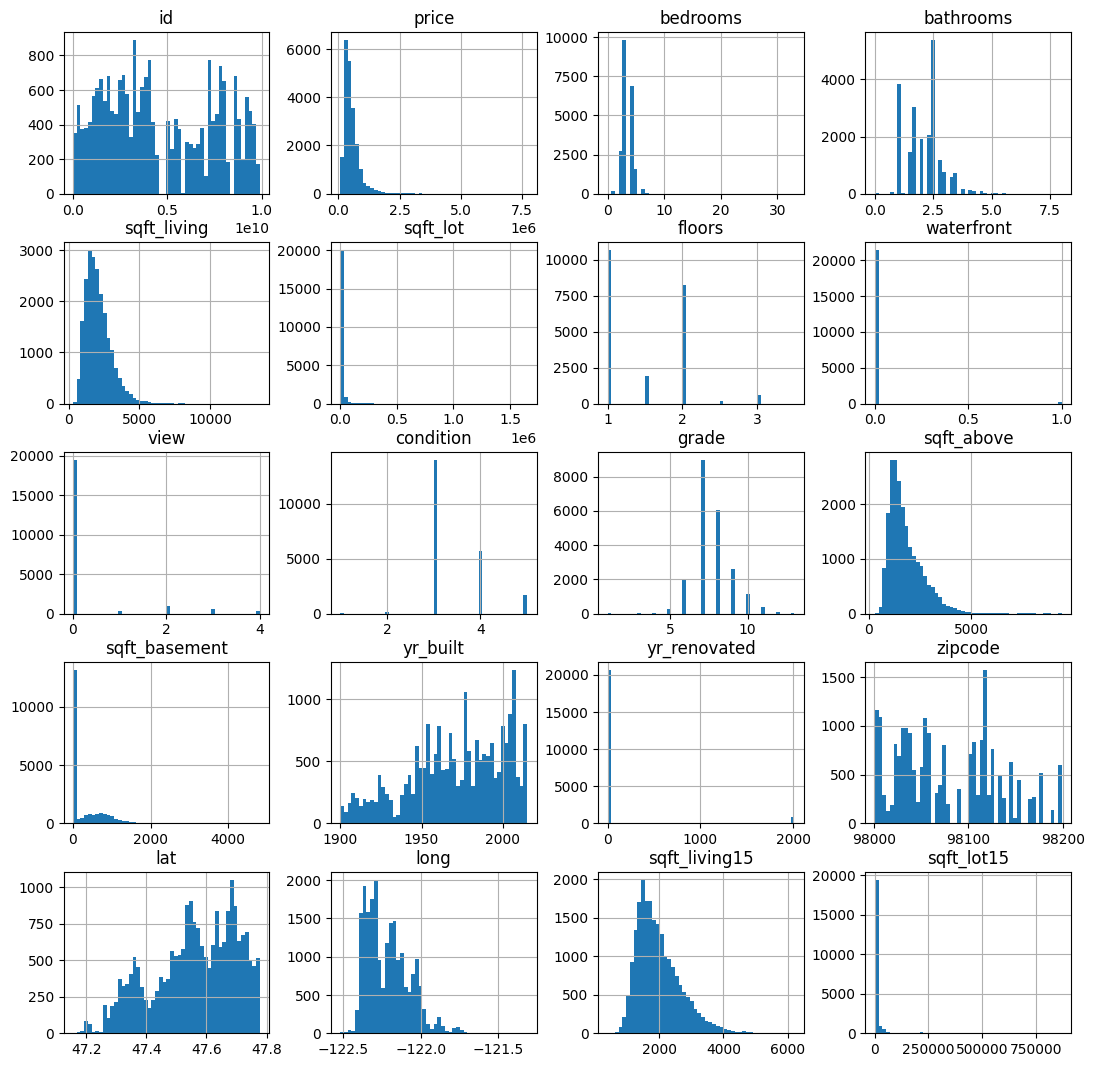

In [337]:
import matplotlib.pyplot as plt

data.hist(bins = 50, figsize = (13,13))
plt.show()

<Axes: >

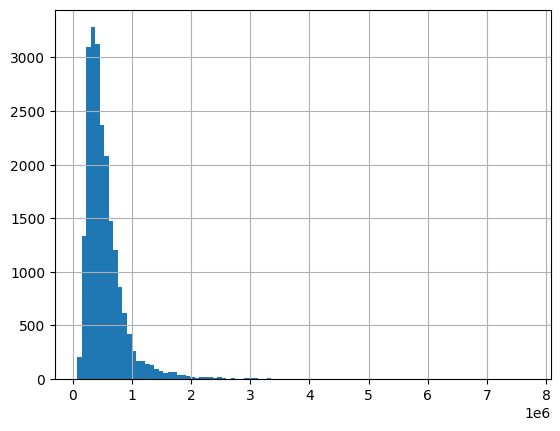

In [338]:
data.price.hist(bins = 100)

<Axes: >

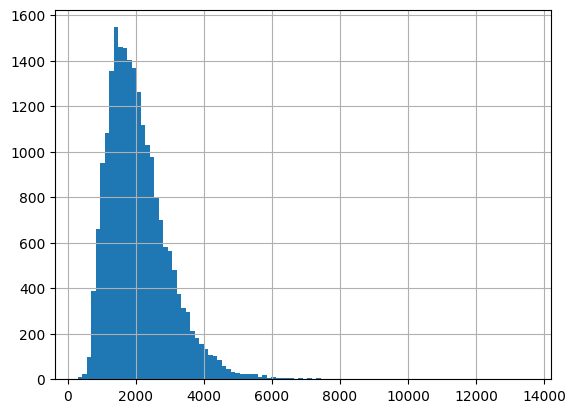

In [339]:
data.sqft_living.hist(bins = 100)

Here I plot the long lat attributes on a scatter plot to to see how the data is laid out in terms of location

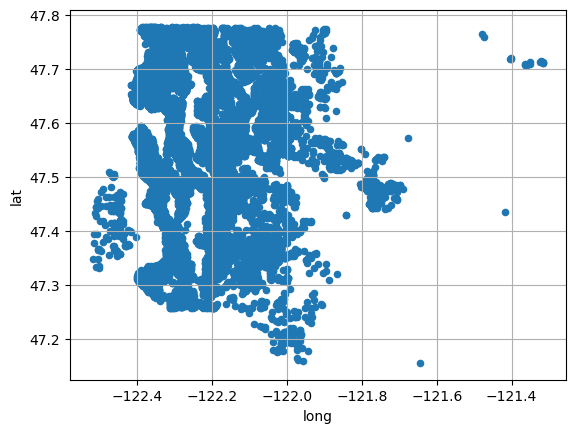

In [340]:
data.plot(kind = "scatter", x = "long", y = "lat", grid = True)
plt.show()

Here I correlate the location data to also be with price

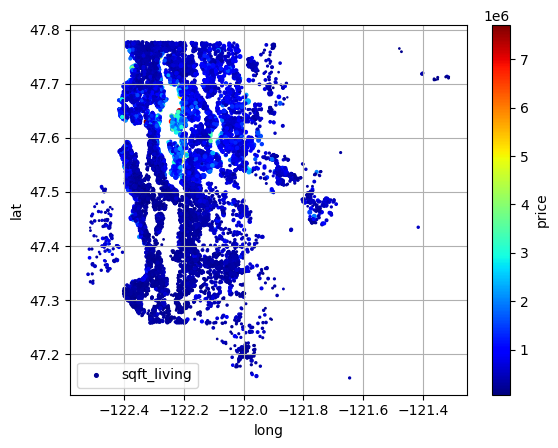

In [341]:
data.plot(kind = "scatter", x = "long", y = "lat", grid = True, s = data["sqft_living"]/1000, label = "sqft_living", c = "price", cmap = "jet", colorbar = True, legend = True, sharex = False)
plt.show()

Here I look at the correlation of each attribute to the price attribute

In [342]:
corr_matrix = data.corr()

corr_matrix["price"].sort_values(ascending = False)

<ipython-input-342-9b35fd8dbed1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

Here I graph a matrix to show the correlation between the highest correlating attributes to price

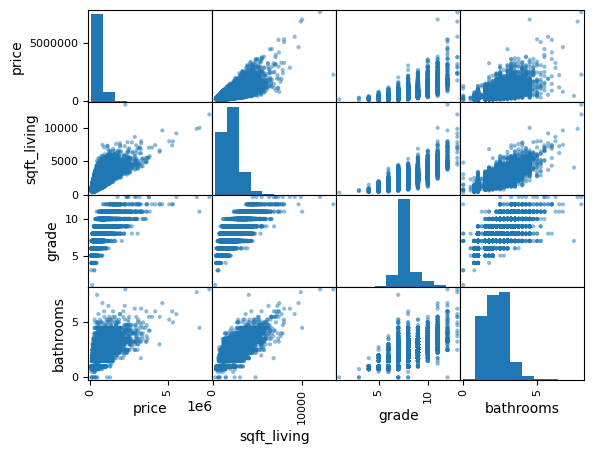

In [343]:
from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "grade", "bathrooms"]
scatter_matrix(data[attributes])
plt.show()

<Axes: xlabel='sqft_living', ylabel='price'>

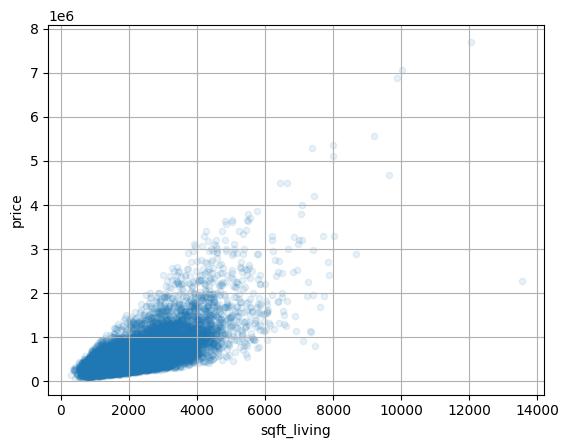

In [344]:
data.plot(kind = "scatter", x = "sqft_living", y = "price", alpha = 0.1, grid = True)

<Axes: xlabel='grade', ylabel='price'>

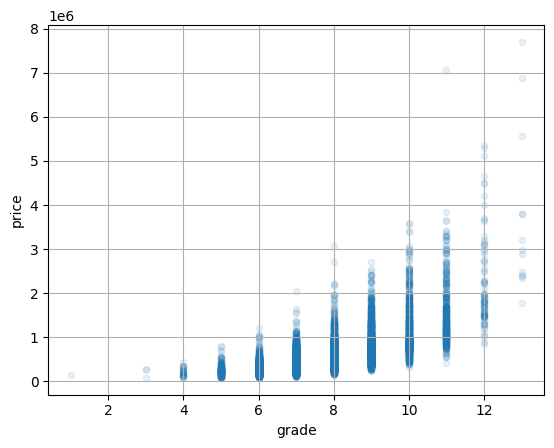

In [345]:
data.plot(kind = "scatter", x = "grade", y = "price", alpha = 0.1, grid = True)

<Axes: xlabel='sqft_above', ylabel='price'>

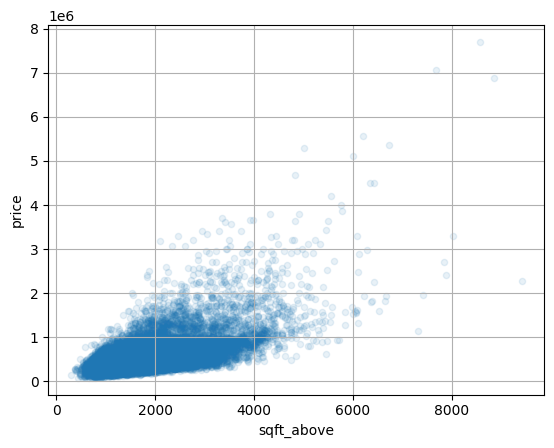

In [346]:
data.plot(kind = "scatter", x = "sqft_above", y = "price", alpha = 0.1, grid = True)

Here I decided to add new features by combining other attributes to see if any have higher correlations

In [411]:
import datetime

year = datetime.datetime.now().year
data["age_of_house"] = year - pd.to_datetime(data["date"]).dt.year
data["sqft_change"] = data["sqft_living"] - data["sqft_living15"]
data["lot_change"] = data["sqft_lot"] - data["sqft_lot15"]

corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending = False)

<ipython-input-411-158fd00f17c6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
sqft_change      0.405392
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
lot_change       0.050591
condition        0.036362
long             0.021626
age_of_house    -0.003576
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

Here I purge the attributes I believed to be redundant such as id and ones that have very little correlation to price

In [412]:
data = data.drop("zipcode", axis = 1)
data = data.drop("view", axis = 1)
data = data.drop("id", axis = 1)
data = data.drop("lot_change", axis = 1)
data = data.drop("date", axis = 1)
data = data.drop("sqft_lot15", axis = 1)


In [413]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
sqft_change      0.405392
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
age_of_house    -0.003576
Name: price, dtype: float64

In [414]:
import numpy as np

def shuffleAndSplitData(data, test_ratio):
    np.random.seed(39)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


Here I split the data 80/20 as thats the ratio I used in HW3 and it seemed to work pretty well. I then split the data sets for one set to have the price attribute alone and the other to have everything but price

In [415]:
test_set, train_set = shuffleAndSplitData(data, 0.2)
train_set_f = train_set.drop("price", axis = 1)
test_set_f = test_set.drop("price", axis = 1)
train_labels = train_set["price"].copy()
test_labels = test_set["price"].copy()

data = train_set_f.copy()

In [416]:
len(train_set)

4322

In [417]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,age_of_house,sqft_change
3853,4,2.25,2820,5000,1.5,0,4,9,1800,1020,1926,0,47.6097,-122.287,2880,8,-60
4111,3,2.50,3310,387684,1.0,0,3,8,2160,1150,1919,1996,47.4167,-121.936,2340,8,970
18555,5,4.00,4280,11307,2.0,0,3,10,2710,1570,1996,0,47.5503,-122.081,3080,9,1200
11039,4,1.75,2350,54450,1.0,0,4,7,1250,1100,1971,0,47.4816,-122.005,2180,8,170
4377,4,1.50,1550,3000,1.5,0,3,7,1350,200,1918,0,47.6604,-122.324,1710,9,-160


In [418]:
train_set_f.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,age_of_house,sqft_change
3853,4,2.25,2820,5000,1.5,0,4,9,1800,1020,1926,0,47.6097,-122.287,2880,8,-60
4111,3,2.50,3310,387684,1.0,0,3,8,2160,1150,1919,1996,47.4167,-121.936,2340,8,970
18555,5,4.00,4280,11307,2.0,0,3,10,2710,1570,1996,0,47.5503,-122.081,3080,9,1200
11039,4,1.75,2350,54450,1.0,0,4,7,1250,1100,1971,0,47.4816,-122.005,2180,8,170
4377,4,1.50,1550,3000,1.5,0,3,7,1350,200,1918,0,47.6604,-122.324,1710,9,-160


In [419]:
test_set_f.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,age_of_house,sqft_change
16897,4,3.25,4010,13797,2.0,0,3,11,4010,0,2003,0,47.5229,-122.152,3980,9,30
2214,3,3.00,1820,4300,1.5,0,4,8,1620,200,1914,1983,47.6711,-122.364,1440,8,380
16781,2,2.25,1730,31491,2.0,1,4,7,1730,0,1947,1988,47.3730,-122.464,1400,9,330
19835,2,2.50,2170,7665,1.0,0,3,8,2170,0,2013,0,47.7112,-122.019,2300,8,-130
15170,3,1.75,1690,53578,1.0,0,3,8,1690,0,1984,0,47.6546,-122.049,2290,9,-600


In [420]:
train_labels.head()

3853     1075000.0
4111      649950.0
18555     839000.0
11039     449000.0
4377      458000.0
Name: price, dtype: float64

Here I set up the transformation pipeling for scaling and prepping the data for the model

In [421]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([("standardize", StandardScaler(),)])

data_num = data.select_dtypes(include=(np.number))
data_num_prep = num_pipeline.fit_transform(data_num)
data_num_prep[:2].round(2)

array([[ 0.7 ,  0.16,  0.8 , -0.23,  0.  , -0.08,  0.91,  1.14,  0.  ,
         1.62, -1.53, -0.21,  0.34, -0.53,  1.27, -1.48, -0.25],
       [-0.4 ,  0.48,  1.34,  7.75, -0.93, -0.08, -0.63,  0.28,  0.44,
         1.91, -1.77,  4.87, -1.08,  1.99,  0.48, -1.48,  1.48]])

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4322 entries, 3853 to 12139
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4322 non-null   int64  
 1   bathrooms      4322 non-null   float64
 2   sqft_living    4322 non-null   int64  
 3   sqft_lot       4322 non-null   int64  
 4   floors         4322 non-null   float64
 5   waterfront     4322 non-null   int64  
 6   condition      4322 non-null   int64  
 7   grade          4322 non-null   int64  
 8   sqft_above     4322 non-null   int64  
 9   sqft_basement  4322 non-null   int64  
 10  yr_built       4322 non-null   int64  
 11  yr_renovated   4322 non-null   int64  
 12  lat            4322 non-null   float64
 13  long           4322 non-null   float64
 14  sqft_living15  4322 non-null   int64  
 15  age_of_house   4322 non-null   int64  
 16  sqft_change    4322 non-null   int64  
dtypes: float64(4), int64(13)
memory usage: 607.8 KB


Here I set up the column and make sure everything work

In [423]:
from sklearn.compose import ColumnTransformer

num_attribs = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "grade", "sqft_above", "sqft_basement", 
               "yr_built", "yr_renovated", "lat", "long", "age_of_house", "sqft_change"]

preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardize',
                                                  StandardScaler())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'sqft_lot', 'floors', 'waterfront', 'grade',
                                  'sqft_above', 'sqft_basement', 'yr_built',
                                  'yr_renovated', 'lat', 'long', 'age_of_house',
                                  'sqft_change'])])

In [424]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

(4322, 15)

In [425]:
preprocessing.get_feature_names_out()

array(['num__bedrooms', 'num__bathrooms', 'num__sqft_living',
       'num__sqft_lot', 'num__floors', 'num__waterfront', 'num__grade',
       'num__sqft_above', 'num__sqft_basement', 'num__yr_built',
       'num__yr_renovated', 'num__lat', 'num__long', 'num__age_of_house',
       'num__sqft_change'], dtype=object)

Here I train the model on the training dataset and look at the first 5 predictions and show the actual values, then I calculate the mean squared error

In [426]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, train_labels)

data_predictions = lin_reg.predict(data)
data_predictions[:5].round(-2)


array([1002200., 1000200., 1086700.,  409500.,  524400.])

In [427]:
train_labels.iloc[:5].values

array([1075000.,  649950.,  839000.,  449000.,  458000.])

In [428]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(train_labels, data_predictions, squared = False )
lin_rmse

206400.6264252706

Here I test the model with the test dataset

In [429]:
data = test_set_f.copy()
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

(17291, 15)

In [430]:


lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, test_labels)

data_predictions = lin_reg.predict(data)
data_predictions[:5].round(-2)

array([1192200.,  845000., 1228600.,  616100.,  490000.])

In [431]:
test_labels.iloc[:5].values

array([972000., 775000., 800000., 695000., 509900.])

In [432]:
lin_rmse = mean_squared_error(test_labels, data_predictions, squared = False )
lin_rmse

205079.09469551395

The results show the model is underfitting the training data. The first thing I would do is try other models and see if a more powerful model performs better. After I would go for trying to create better features for the model to use. 